# Proyek Akhir Certan

<table align="left">
    <tr>
        <td style="text-align:left">Kode Mata Kuliah</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left">10S3001</td>
    </tr>
    <tr>
        <td style="text-align:left">Nama Mata Kuliah</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left">Kecerdasan Buatan</td>
    </tr>
    <tr>
        <td style="text-align:left">Kelompok</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left"><i>07</i></td>
    </tr>
</table>

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns 
import plotly as py
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("D:\Semester 5\CERTAN\Proyek Akhir Certan/Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
data.shape

(200, 5)

In [13]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [14]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [16]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [17]:
plt.style.use('fivethirtyeight')

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

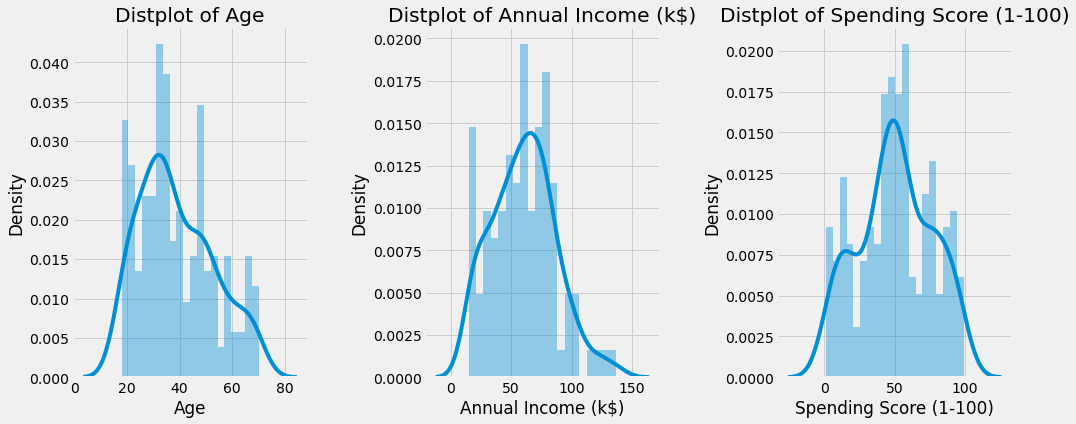

In [21]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(data[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

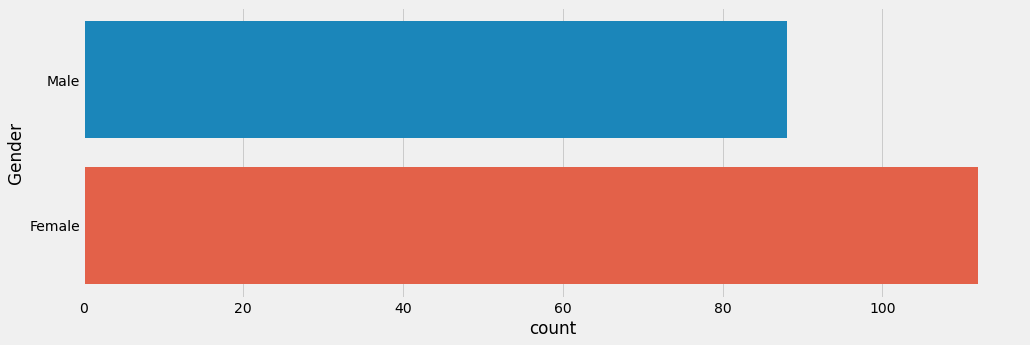

In [23]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = data)
plt.show()

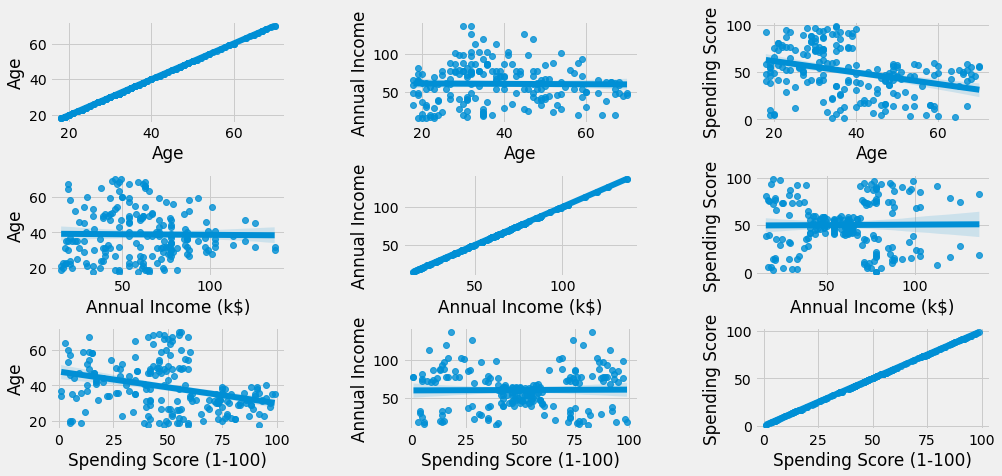

In [25]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = data)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

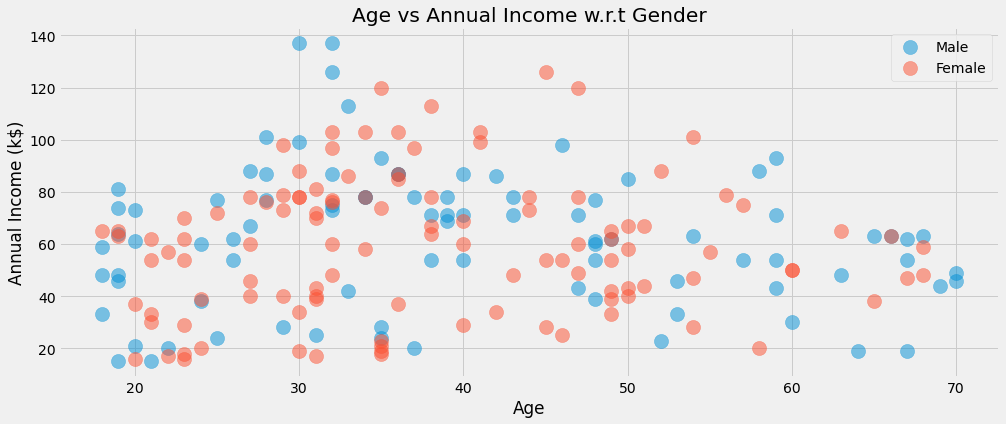

In [26]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = data[data['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

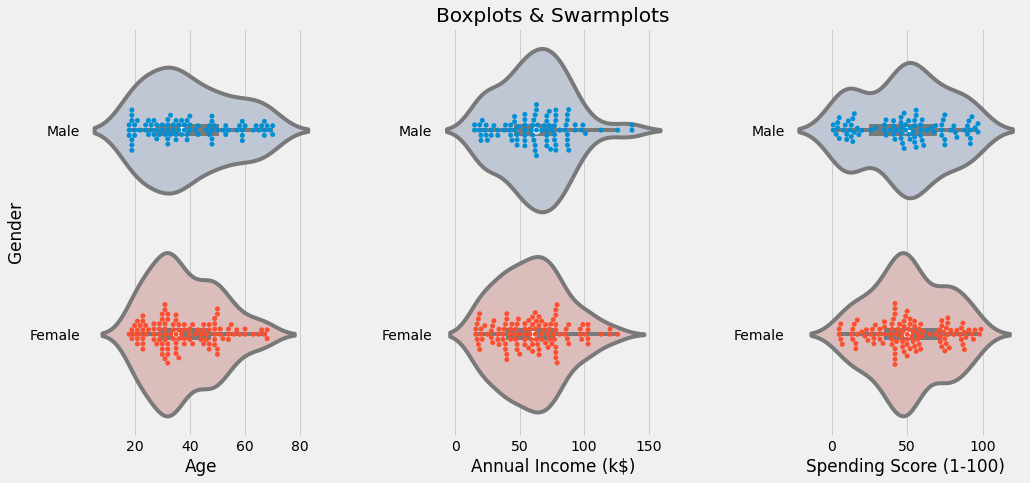

In [28]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = data , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = data)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

### Clustering Using Gaussian Mixture Model

In [29]:
# Selecting relevant features for clustering
cluster_data = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [30]:
# Standardize the data
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

In [31]:
# Fit Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(cluster_data_scaled)

GaussianMixture(n_components=3, random_state=42)

In [32]:
# Predict clusters
clusters = gmm.predict(cluster_data_scaled)

In [33]:
# Add cluster labels to the original dataframe
data['Cluster'] = clusters

In [34]:
# Visualize the clusters
plt.figure(figsize=(15, 7))

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

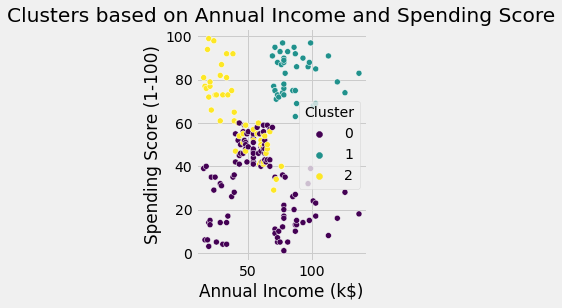

In [35]:
plt.subplot(1, 2, 1)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='viridis')
plt.title('Clusters based on Annual Income and Spending Score')
plt.savefig('cluster_annual_income_spending_score.png')  # Save the plot

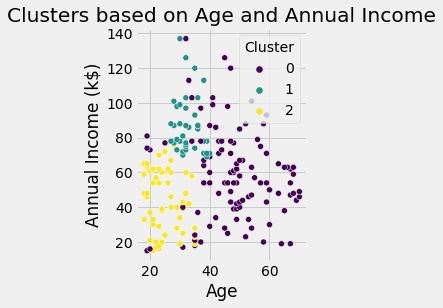

In [36]:
plt.subplot(1, 2, 2)
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Cluster', data=data, palette='viridis')
plt.title('Clusters based on Age and Annual Income')
plt.savefig('cluster_age_annual_income.png')  # Save the plot
 
plt.show()